# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# 2. Collect and load data

In [3]:
df= pd.read_csv('bigcity.csv')
df.head()


,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [4]:
df.drop('Unnamed: 0', axis= 1, inplace= True)

In [5]:
df.head()

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


# 3. Explore numeric variables - five number summary

In [6]:
df.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


# 3a. Visualize numeric variables in boxplot and histograms

u


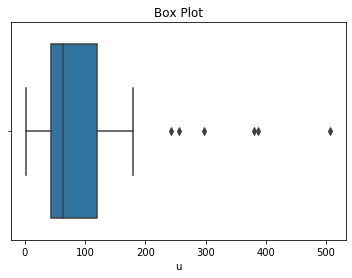

x


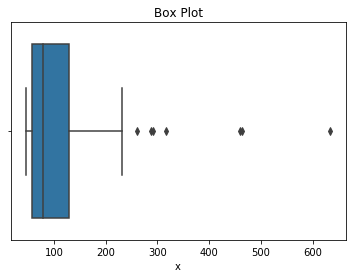

In [7]:
for i in df.columns:
    print(i)
    sns.boxplot(df[i])
    plt.title('Box Plot')
    plt.show()

(array([20., 15.,  5.,  3.,  1.,  2.,  0.,  2.,  0.,  1.]),
 array([  2. ,  52.5, 103. , 153.5, 204. , 254.5, 305. , 355.5, 406. ,
        456.5, 507. ]),
 <a list of 10 Patch objects>)

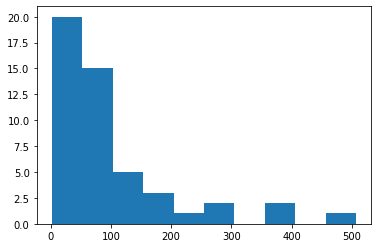

In [8]:
plt.hist(df['u'])

(array([31.,  9.,  1.,  2.,  3.,  0.,  0.,  2.,  0.,  1.]),
 array([ 46. , 104.8, 163.6, 222.4, 281.2, 340. , 398.8, 457.6, 516.4,
        575.2, 634. ]),
 <a list of 10 Patch objects>)

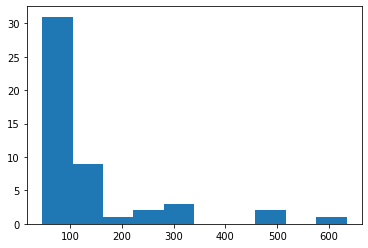

In [9]:
plt.hist(df['x'])

# 3b. Measure spread – variance and standard deviation

In [13]:
range_1920 = df['u'].max() - df['u'].min()
range_1930 = df['x'].max() - df['x'].min()
print('The Range of 1920 is :', range_1920)
print('The Range of 1930 is :', range_1930)
df

The Range of 1920 is : 505
The Range of 1930 is : 588


In [18]:
print('The Variation for year 1920 is :',df['u'].var())
print('The Variation for year 1930 is ',df['x'].var())

print('The Std. deviation for year 1920 is :',df['u'].std())
print('The Std. deviation for year 1930 is:',df['x'].std())

The Variation for year 1920 is : 10900.416666666662
The Variation for year 1930 is  15158.832482993197
The Std. deviation for year 1920 is : 104.40506054146351
The Std. deviation for year 1930 is: 123.12121053252034


# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

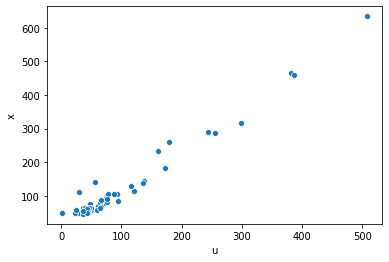

In [41]:
sns.scatterplot(data=df,x='u',y='x')

In [17]:
df.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [19]:
u = np.sqrt(df['u'])

In [20]:
x = np.sqrt(df['x'])

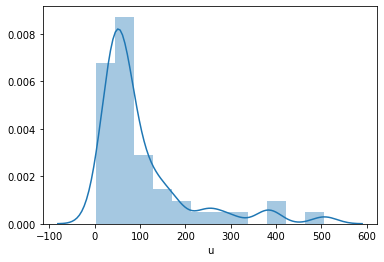

In [24]:
sns.distplot(df['u'])

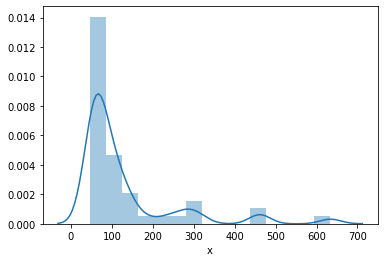

In [25]:
sns.distplot(df['x'])

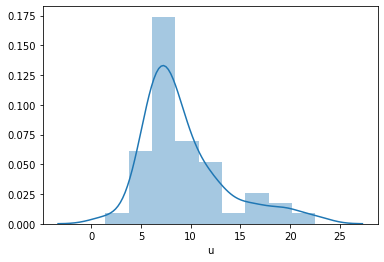

In [23]:
sns.distplot(u)

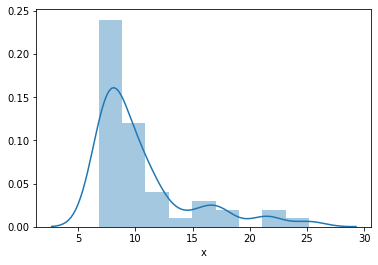

In [22]:
sns.distplot(x)

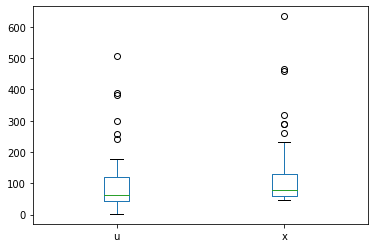

In [21]:
df.plot(kind='box')

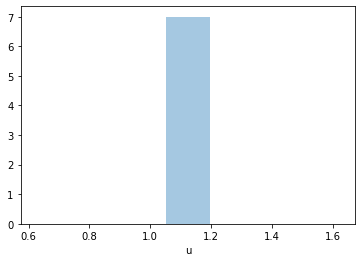

In [67]:
sns.distplot(df['u'])

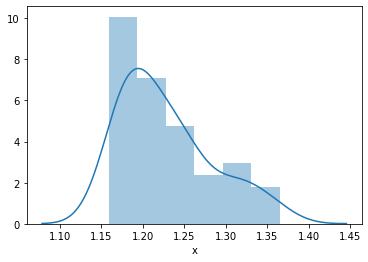

In [59]:
sns.distplot(df['x'])

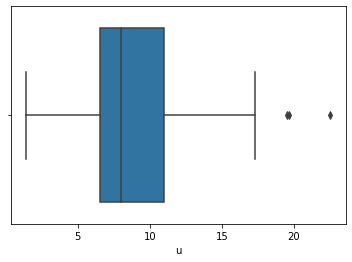

In [28]:
sns.boxplot(u)

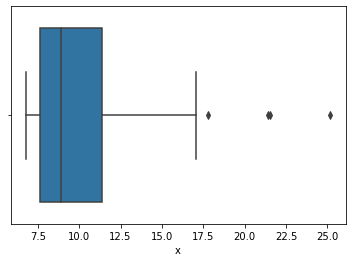

In [26]:
sns.boxplot(x)

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [49]:
df.isnull().sum()

u    0
x    0
dtype: int64

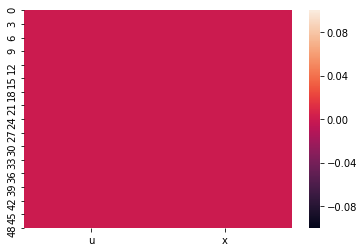

In [72]:
sns.heatmap(df.isnull())

In [29]:
df.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [31]:
y=df['x']
X=df.drop('x',axis=1)
df.shape

(49, 2)

In [33]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(39, 1) (39,) (10, 1) (10,)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [34]:
lr=LinearRegression()   

lr.fit(X_train,y_train)
pd.DataFrame(lr.coef_,index=X.columns,columns=['coef'])

,coef
u,1.192986


In [35]:
pd.DataFrame(lr.intercept_,index=X.columns,columns=['intercept'])

,intercept
u,5.789995


# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

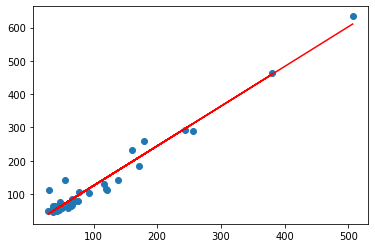

In [36]:
plt.scatter(X_train, y_train)
plt.plot(X_train,lr.predict(X_train),color='r')
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [42]:
lr=LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [43]:
print('The r squared of the model is :', r2_score(y_test, y_test_pred))
print('The RMSE of the model is :', np.sqrt(mean_squared_error(y_test,y_test_pred)))

The r squared of the model is : -1.2213081220664836
The RMSE of the model is : 191.69394134765068


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [45]:
print('Score_train =',lr.score(X_train,y_train))
print('Score_test =',lr.score(X_test,y_test))

Score_train = 0.963230605921217
Score_test = 0.9608072350674559
